In [52]:
import numpy as np
np.random.seed(400)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline  

In [53]:
documents=pd.read_csv('abcnews-date-text.csv')
documents.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [54]:
documents.drop(['publish_date'],axis=1,inplace=True)
documents.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [55]:
print(len(documents))

1244184


In [56]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *


import nltk

In [57]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smsoo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
print(WordNetLemmatizer().lemmatize('went', pos = 'v')) 

go


In [59]:
stemmer = SnowballStemmer("english")

original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']

singles = [stemmer.stem(plural) for plural in original_words]

pd.DataFrame(data={'original word':original_words, 'stemmed':singles })



,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [60]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [68]:
document_num = 4310
doc_sample = documents.iloc[document_num - 1]['headline_text']  

print("Original document: ")
print(doc_sample)
words = doc_sample.split(' ')
print(words)

print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
rain helps dampen bushfires
['rain', 'helps', 'dampen', 'bushfires']


Tokenized and lemmatized document: 
['rain', 'help', 'dampen', 'bushfir']


In [69]:
documents['headline_cleaned_text']=documents['headline_text'].apply(preprocess)

In [71]:
documents

,headline_text,headline_cleaned_text
0,aba decides against community broadcasting lic...,"[decid, communiti, broadcast, licenc]"
1,act fire witnesses must be aware of defamation,"[wit, awar, defam]"
2,a g calls for infrastructure protection summit,"[call, infrastructur, protect, summit]"
3,air nz staff in aust strike for pay rise,"[staff, aust, strike, rise]"
4,air nz strike to affect australian travellers,"[strike, affect, australian, travel]"
...,...,...
1244179,two aged care residents die as state records 2...,"[age, care, resid, state, record]"
1244180,victoria records 5;919 new cases and seven deaths,"[victoria, record, case, seven, death]"
1244181,wa delays adopting new close contact definition,"[delay, adopt, close, contact, definit]"
1244182,western ringtail possums found badly dehydrate...,"[western, ringtail, possum, bad, dehydr, heatwav]"


BAG OF WORDS:

In [72]:
processed_docs = documents['headline_cleaned_text']

In [108]:
print(processed_docs[:10])

0            [decid, communiti, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_cleaned_text, dtype: object


In [73]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [74]:
print(dictionary)

Dictionary<70192 unique tokens: ['broadcast', 'communiti', 'decid', 'licenc', 'awar']...>


In [76]:
from collections import Counter
count = Counter()
for doc in processed_docs:
    for word in doc:
        count[word]+=1

In [79]:
print(count['broadcast'])
print(count['communiti'])

457
6602


In [80]:
len(count)

70192

In [88]:
dictionary.filter_extremes(no_below=15, no_above=0.1)
dictionary.save('dictionary.gensim')
len(dictionary)
processed_docs[0]

['decid', 'communiti', 'broadcast', 'licenc']

In [90]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [91]:
bow_corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1)]

LDA - IMPLEMENTATION

In [93]:

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 50)

In [94]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.032*"charg" + 0.028*"court" + 0.026*"polic" + 0.025*"interview" + 0.021*"murder" + 0.021*"face" + 0.018*"case" + 0.017*"jail" + 0.014*"alleg" + 0.013*"drug"


Topic: 1 
Words: 0.032*"govern" + 0.019*"live" + 0.017*"countri" + 0.016*"deal" + 0.015*"south" + 0.012*"hour" + 0.011*"secur" + 0.011*"question" + 0.011*"royal" + 0.010*"rescu"


Topic: 2 
Words: 0.016*"world" + 0.015*"australia" + 0.015*"final" + 0.015*"kill" + 0.014*"win" + 0.013*"queensland" + 0.012*"gold" + 0.012*"break" + 0.010*"coast" + 0.010*"peopl"


Topic: 3 
Words: 0.019*"say" + 0.017*"elect" + 0.017*"health" + 0.016*"trump" + 0.016*"council" + 0.016*"plan" + 0.016*"call" + 0.014*"urg" + 0.013*"govt" + 0.011*"labor"


Topic: 4 
Words: 0.024*"year" + 0.016*"adelaid" + 0.014*"return" + 0.014*"time" + 0.013*"communiti" + 0.013*"farm" + 0.012*"meet" + 0.011*"speak" + 0.010*"australia" + 0.008*"media"


Topic: 5 
Words: 0.044*"australian" + 0.041*"coronavirus" + 0.025*"covid" + 0.024*"hous" + 0.016*"open"

In [102]:
unseen_document = "The police arrested the man who murdered the minister and filed charges against him"

bow_vector = dictionary.doc2bow(preprocess(unseen_document))
threshold = 0.1  # dont show topics below this threshold
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    if score < threshold: break
    print("Score: {}\n Topic: {}".format(score, lda_model.print_topic(index, 5)))
    print()

Score: 0.7285746932029724
 Topic: 0.032*"charg" + 0.028*"court" + 0.026*"polic" + 0.025*"interview" + 0.021*"murder"

Score: 0.1571308821439743
 Topic: 0.019*"say" + 0.017*"elect" + 0.017*"health" + 0.016*"trump" + 0.016*"council"



In [112]:
from gensim.models.coherencemodel import CoherenceModel
processed_docs_list = documents['headline_cleaned_text'].tolist()
coherence_model = CoherenceModel(model=lda_model, texts=processed_docs_list, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(coherence_score)

0.2718589058278372


VISUALISATION OF LDA

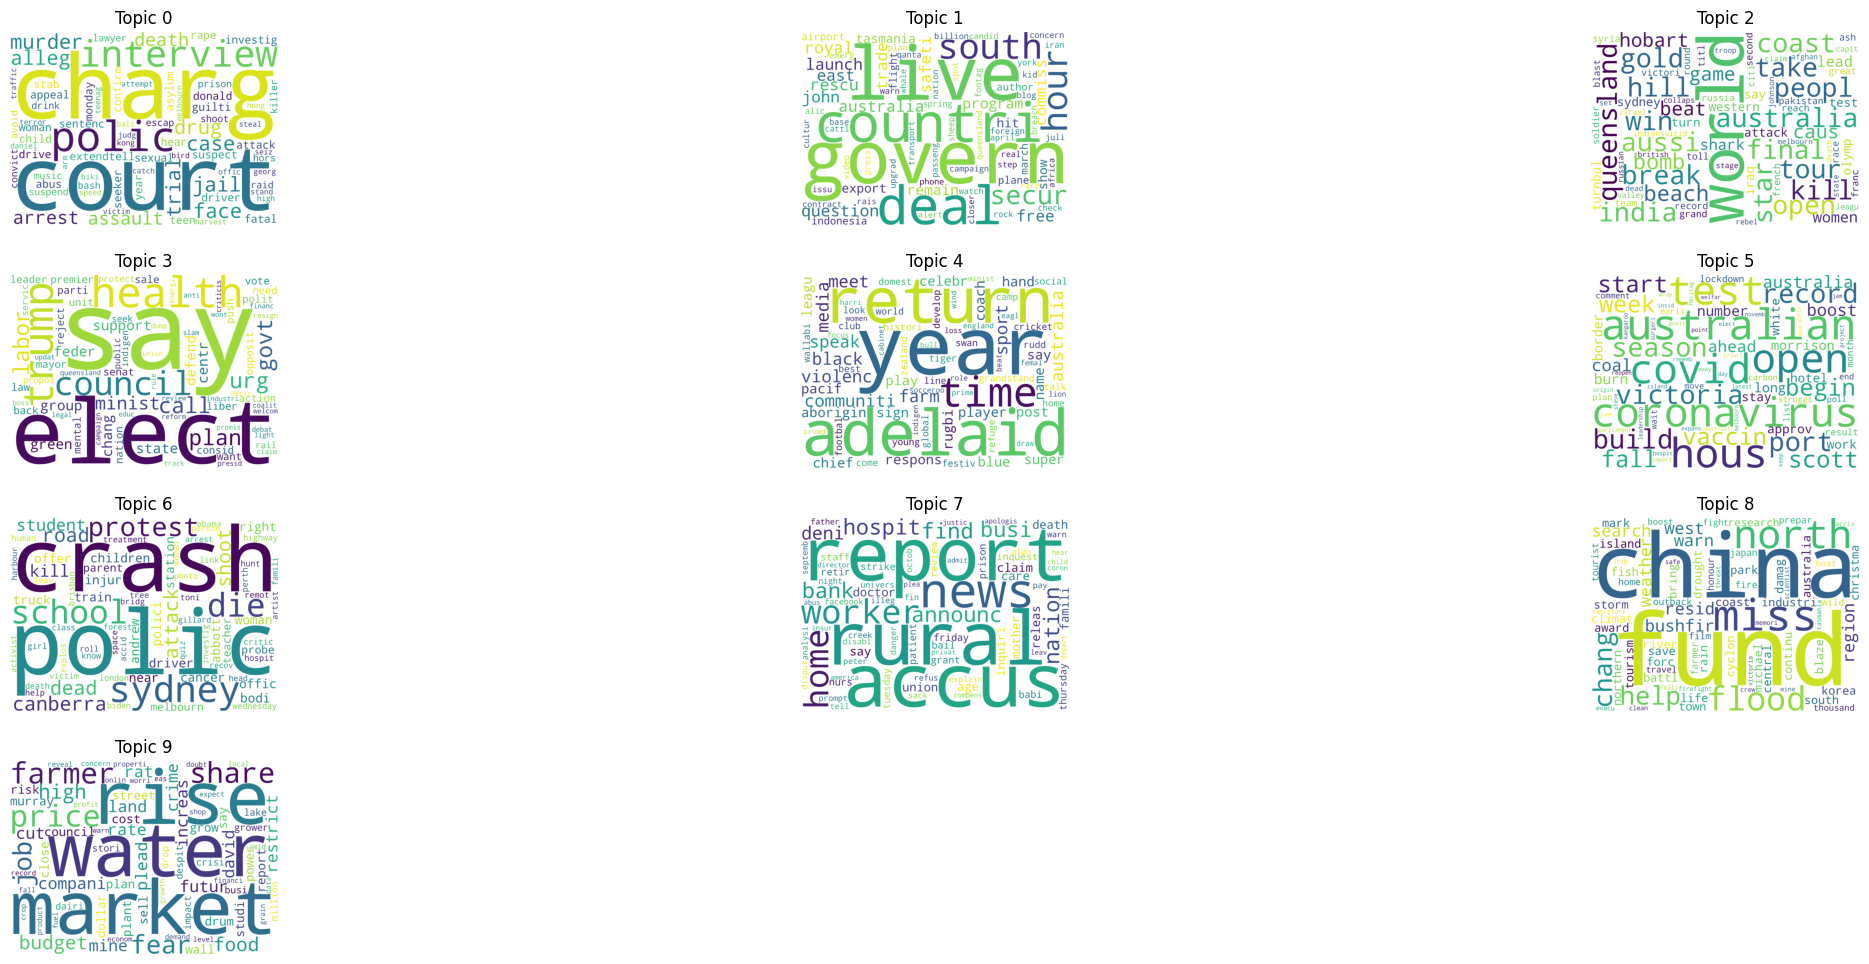

In [104]:
from wordcloud import WordCloud, STOPWORDS

def word_cloud(topic, model, ax):
    topic_words = [model.print_topic(topic, 75)]
    cloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                      width=2500, height=1800).generate(" ".join(topic_words))

    ax.imshow(cloud)
    ax.axis('off')
    ax.set_title(f'Topic {topic}')

num_topics = 10
fig, axes = plt.subplots(nrows=(num_topics // 3) + (num_topics % 3 > 0), ncols=3, figsize=(24, 10))
axes = axes.flatten()
for i, topic in enumerate(range(num_topics)):
    word_cloud(topic, lda_model, axes[i])
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()